In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = scipy.io.loadmat('./train_32x32.mat')


In [6]:
# reshaping data to required format
print('X dimensions before:', dataset['X'].shape)
print('y dimensions before:', dataset['y'].shape)
x_data = dataset['X'].transpose((3,0,1,2)).reshape((73257,32*32*3))
y_data = dataset['y'].flatten()
print('X dimensions after:',x_data.shape)
print('y dimensions after:',y_data.shape)

X dimensions before: (32, 32, 3, 73257)
y dimensions before: (73257, 1)
X dimensions after: (73257, 3072)
y dimensions after: (73257,)


In [7]:
# random 2500 samples from dataset where dataset['y']%10 = 0 to 9
random_samples = np.empty((0,3072))
y = np.empty((0,))

for i in range(0,10):
    x_temp = x_data[y_data%10 == i]
    y_temp = y_data[y_data%10 == i]
    random_indices = np.random.choice(x_temp.shape[0], 2500)
    random_samples = np.append(random_samples,x_temp[random_indices],axis=0)
    y = np.append(y,y_temp[random_indices],axis=0)
    # print(random_samples.shape)

ten_samples = np.array([random_samples[i] for i in range(0,24999,2500)])
y_ten_samples = np.array([y[i] for i in range(0,24999,2500 )])
random_samples, y = shuffle(random_samples,y,random_state=0) # shuffle randomly in unison

1a.

In [8]:
# Create a PCA object and fit it to the standardized data
pca = PCA()
pca.fit(random_samples)

PCA()

In [9]:
# Transform the data to its principal components
pca_data = pca.transform(random_samples)
print(pca_data.shape)

(25000, 3072)


In [10]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_

Number of components required for a variance ratio of at least 0.9 is 27
Proportion of Variance for 27 components is 0.9017780004034394


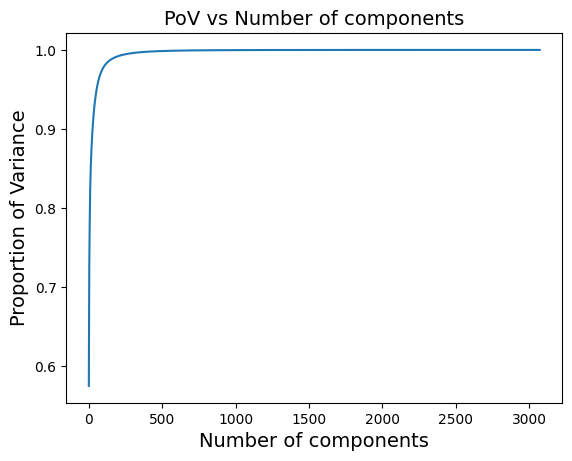

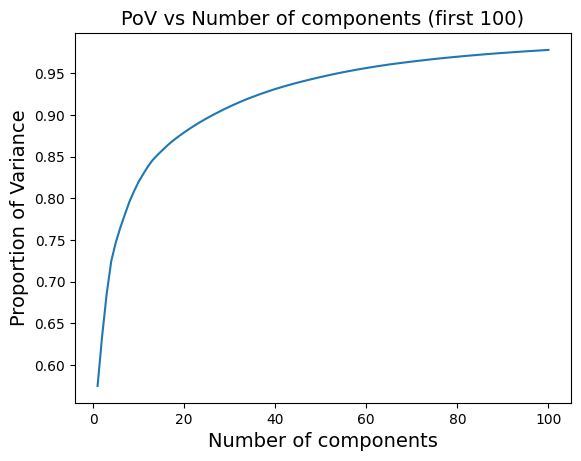

In [11]:
# Plotting Proportion of Variance (PoV) against the number of eigenvectors

# cumulative sum of eigenvalues
cumulative_pov = np.cumsum(var_ratio)
num_eigen = 0
for i in range(0,len(cumulative_pov)):
    if cumulative_pov[i] >= 0.9:
        print('Number of components required for a variance ratio of at least 0.9 is', i+1)
        print('Proportion of Variance for {} components is {}'.format(i+1,cumulative_pov[i]))
        num_eigen = i+1
        break

# print(cumulative_pov[25])       # required 26 eigenvectors
plt.plot(range(1,len(cumulative_pov) + 1), cumulative_pov)
plt.title('PoV vs Number of components',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

plt.plot(range(1,101), cumulative_pov[:100])
plt.title('PoV vs Number of components (first 100)',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

In [12]:
# STEPS
# TODO: get 10 samples DONE
# TODO: transform to pca
# TODO: plot and print values along first 10 eigenvectors




In [13]:
# make a transform matrix for pca using only top 26 eigenvectors

# transform_matrix = eigenvectors[:num_eigen]
# trans_samples2 = np.matmul(ten_samples,transform_matrix.T)
trans_samples = pca.transform(ten_samples)


print('1')
print(trans_samples.shape)
print(trans_samples)
# print('2')
# print(trans_samples2.shape)
# print(trans_samples2)

1
(10, 3072)
[[ 4.59156399e+03  1.14074332e+02  4.16077308e+01 ...  3.48101107e-02
   1.04483551e-01 -2.66920425e-01]
 [ 1.66691859e+03 -5.79578078e+02 -2.05099251e+03 ...  2.32255501e-01
   3.56830194e-02  4.21919817e-01]
 [ 2.66608874e+03 -3.03998285e+02  6.52624488e+02 ... -1.73683367e-01
  -7.05739306e-02  5.45356257e-02]
 ...
 [ 4.62892405e+02  9.21646322e+01 -4.42674368e+02 ... -1.36190912e-01
   2.10478447e-01  1.73075547e-01]
 [-1.79257199e+03 -6.05563448e+02  2.25167957e+02 ...  2.02419816e-01
   3.14075733e-02 -1.73748295e-01]
 [ 8.39225169e+01 -1.79243419e-01  7.08671672e+02 ... -1.22500543e-01
   1.84770650e-02  2.59244489e-01]]


1b.

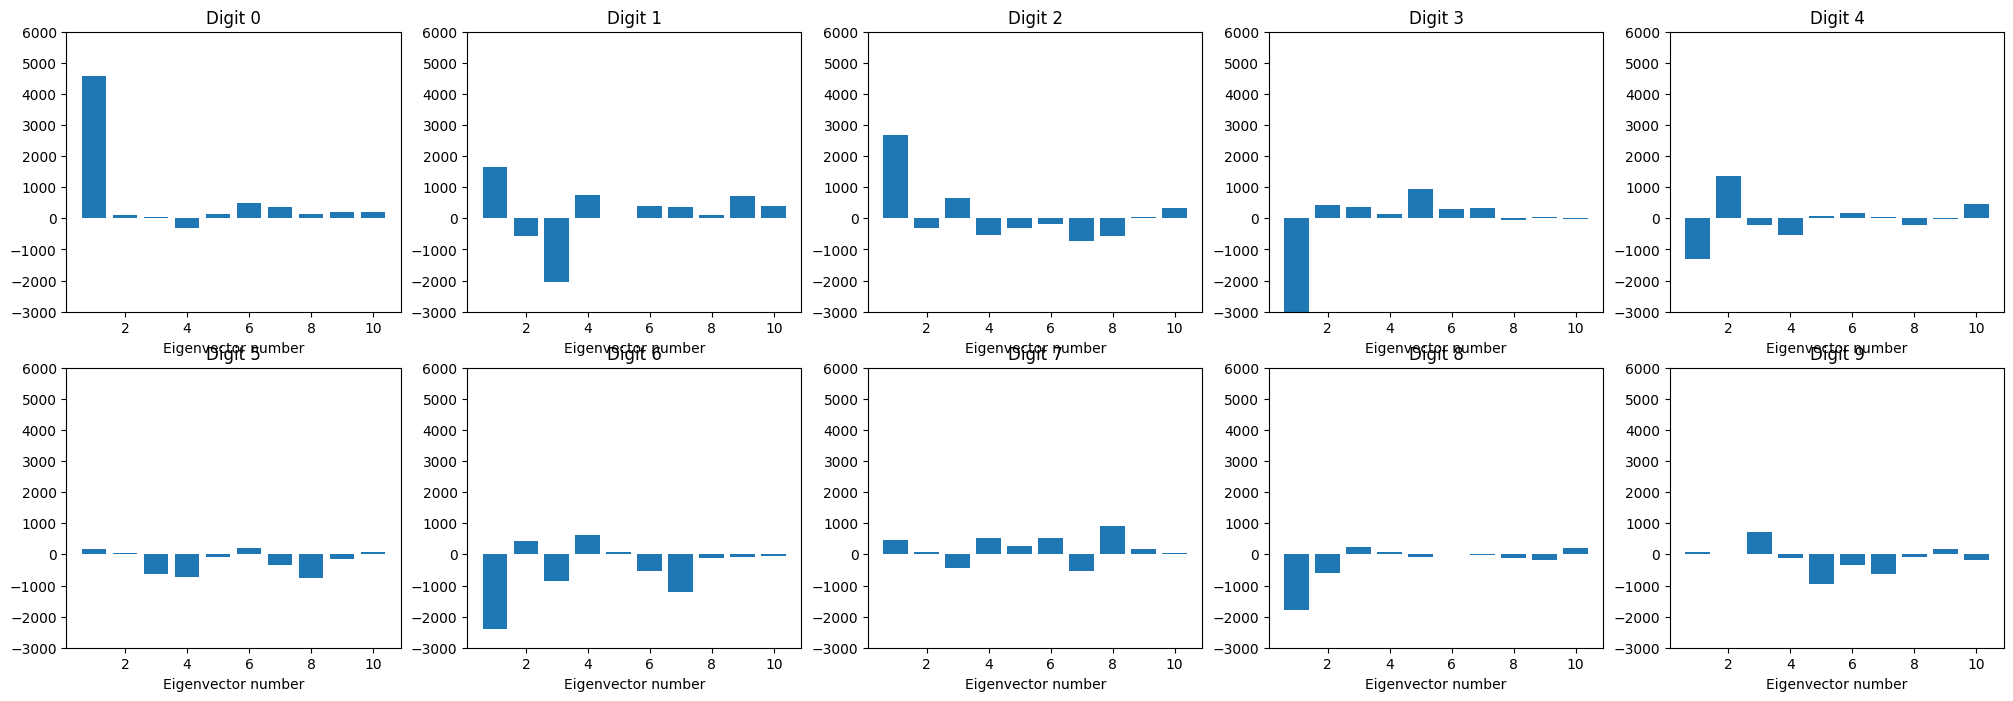

In [ ]:
# for i in range(0,10):
#     print('Sample for digit', i)
#     sample_i = trans_samples[i][:10]
#     plt.bar(range(1,11), sample_i)
#     plt.show()

plt.figure(figsize=(25,10))
for i in range(0,10):
    sample_i = trans_samples[i][:10]
    ax = plt.subplot2grid((2,5), (i//5,i%5))
    ax.bar(range(1,11), sample_i)
    ax.set_ylim(-3000,6000)
    # ax.set_ylabel('Component along eigenvector')
    ax.set_xlabel('Eigenvector number')
    ax.set_title('Digit {}'.format(i))
plt.show()

In [15]:
new_transformed_data = trans_samples
for i in range(0,len(new_transformed_data)):
    new_transformed_data[i][11:] = 0

ten_samples_reconstructed = pca.inverse_transform(new_transformed_data)

print(ten_samples_reconstructed.shape)
print(new_transformed_data)
print(ten_samples_reconstructed)

(10, 3072)
[[ 4.59156399e+03  1.14074332e+02  4.16077308e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.66691859e+03 -5.79578078e+02 -2.05099251e+03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.66608874e+03 -3.03998285e+02  6.52624488e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.62892405e+02  9.21646322e+01 -4.42674368e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.79257199e+03 -6.05563448e+02  2.25167957e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.39225169e+01 -1.79243419e-01  7.08671672e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[207.6420636  207.87046892 208.66350418 ... 186.32633238 184.71242493
  187.81943945]
 [ 85.62075252  83.6759192   96.73955863 ... 157.88604373 163.25459638
  174.24382372]
 [178.33643338 185.86433062 194.35020822 ... 185.90318117 192.56471012
  191.96473783]
 ...
 [ 73.62555694  72.15162957  78.51746657 ... 125.42888634 126.87529066
  133.07252718]


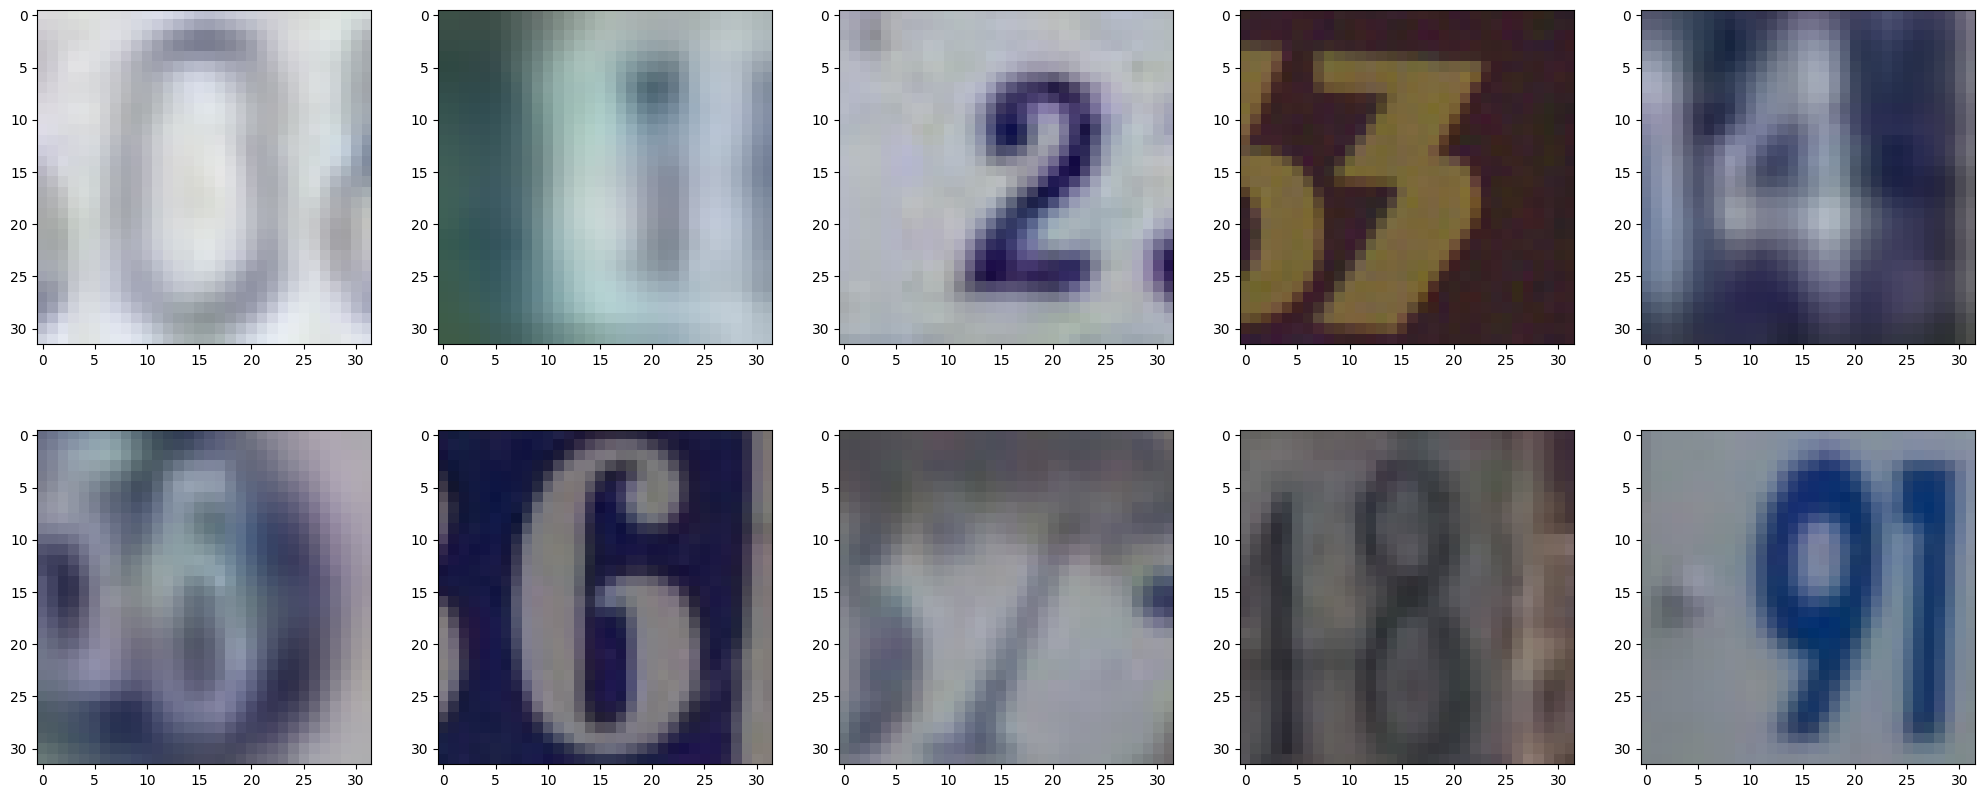

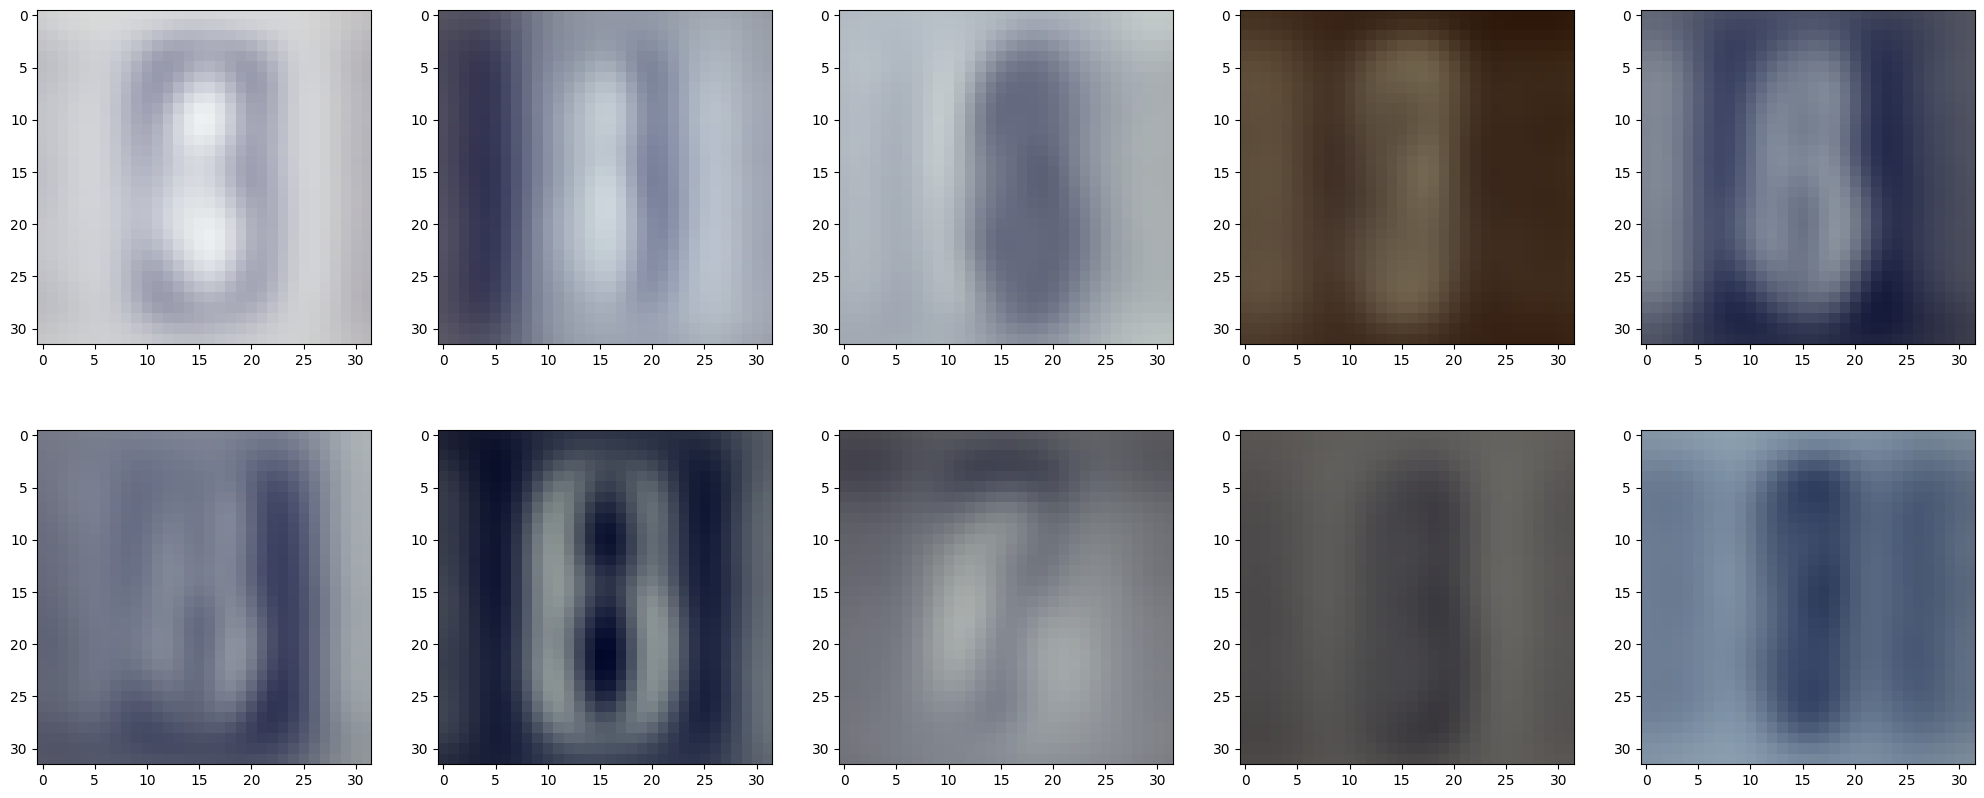

In [36]:
# def features_to_image(features):
#     features = features.astype('uint8').reshape((32,32,3))
#     plt.figure()
#     plt.imshow(features)

# for sample in ten_samples:
#     features_to_image(sample)

# for sample in ten_samples_reconstructed:
#     features_to_image(sample)

def display_ten_samples(samples):
    plt.figure(figsize=(25,10))
    for i in range(0,10):
        sample_i = trans_samples[i][:10]
        ax = plt.subplot2grid((2,5), (i//5,i%5))
        features = samples[i].astype('uint8').reshape((32,32,3))
        ax.imshow(features)

display_ten_samples(ten_samples)
display_ten_samples(ten_samples_reconstructed)

# plot 2d image rgb
# plt.imshow(ten_samples[0].astype('uint8').reshape((32,32,3)))# 

Organizing data

In [ ]:
# (a)
x_raw_data = random_samples
y_raw_data = y
x_pca_data = pca_data
y_pca_data = y

# (b)
x_ten_data = ten_samples
y_ten_data = y_ten_samples
x_ten_pca_data = trans_samples
y_ten_pca_data = y_ten_samples

np.save('./x_raw_data.npy',x_raw_data)
np.save('./y_raw_data.npy',y_raw_data)
np.save('./x_pca_data.npy',x_pca_data)
np.save('./y_pca_data.npy',y_pca_data)
np.save('./x_ten_data.npy',x_ten_data)
np.save('./y_ten_data.npy',y_ten_data)
np.save('./x_ten_pca_data.npy',x_ten_pca_data)
np.save('./y_ten_pca_data.npy',y_ten_pca_data)

test_dataset = scipy.io.loadmat('./test_32x32.mat')
x_test = test_dataset['X'].transpose((3,0,1,2)).reshape((26032,32*32*3))
y_test = test_dataset['y'].flatten()

1c. 

In [31]:
# k = 5
knn_5_raw = KNeighborsClassifier(n_neighbors=5)
knn_5_26 = KNeighborsClassifier(n_neighbors=5)
knn_5_ten = KNeighborsClassifier(n_neighbors=5)

knn_5_raw.fit(x_raw_data,y_raw_data)
knn_5_26.fit(x_pca_data[:,:26],y_pca_data)
knn_5_ten.fit(x_pca_data[:,:10],y_pca_data)

KNeighborsClassifier()

In [35]:
y_preds_raw = knn_5_raw.predict(x_test)
y_preds_26 = knn_5_26.predict(x_test)
y_preds_ten = knn_5_ten.predict(x_test)

accuracy_5_raw = accuracy_score(y_test,y_preds_raw)
accuracy_5_26 = accuracy_score(y_test,y_preds_26)
accuracy_5_raw = accuracy_score(y_test,y_preds_raw)

print('Accuracy of KNN model (k=5) on raw data is', accuracy_5_raw)
print('Accuracy of KNN model (k=5) on raw data is', accuracy_5_26)
print('Accuracy of KNN model (k=5) on raw data is', accuracy_5_ten)

ValueError: X has 3072 features, but KNeighborsClassifier is expecting 26 features as input.

In [ ]:
# k = 7
knn_7_raw = KNeighborsClassifier(n_neighbors=7)
knn_7_26 = KNeighborsClassifier(n_neighbors=7)
knn_7_ten = KNeighborsClassifier(n_neighbors=7)

knn_7_raw.fit(x_raw_data,y_raw_data)
knn_7_26.fit(x_pca_data[:,:26],y_pca_data)
knn_7_ten.fit(x_pca_data[:,:10],y_pca_data)

In [ ]:
y_preds_raw = knn_5_raw.predict(x_test)
y_preds_26 = knn_5_26.predict(x_test)
y_preds_ten = knn_5_ten.predict(x_test)

accuracy_7_raw = accuracy_score(y_test,y_preds_raw)
accuracy_7_26 = accuracy_score(y_test,y_preds_26)
accuracy_7_raw = accuracy_score(y_test,y_preds_raw)

print('Accuracy of KNN model (k=5) on raw data is', accuracy_7_raw)
print('Accuracy of KNN model (k=5) on raw data is', accuracy_7_26)
print('Accuracy of KNN model (k=5) on raw data is', accuracy_7_ten)